In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144786 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [30]:
from keras.datasets import mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()


In [31]:
print('x_train shape:',x_train.shape,'\nx_valid.shape:',x_valid.shape)

x_train shape: (60000, 28, 28) 
x_valid.shape: (10000, 28, 28)


In [32]:
x_train.dtype #correspond 0-255 white and black 

dtype('uint8')

In [33]:
x_train.min(),x_train.max()

(0, 255)

In [34]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

 number: 5


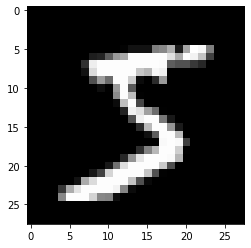

In [35]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

print(' number:',y_train[0])

In [36]:
#Flatten
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

In [37]:
print('x_train shape:',x_train.shape,'\nx_valid.shape:',x_valid.shape)

x_train shape: (60000, 784) 
x_valid.shape: (10000, 784)


In [38]:
#Normalization:
x_train = x_train / 255
x_valid = x_valid / 255 

In [42]:
#We can now see that the values are all floating point values between 0.0 and 1.0:

x_train.max(),  x_train.min()

(1.0, 0.0)

In [45]:
#Encoding

import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)


In [46]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
#hidden layers
model.add(Dense(units=512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = 10, activation='softmax'))

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(
    x_train, y_train, epochs=5, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1905 - accuracy: 0.9431 - val_loss: 0.0946 - val_accuracy: 0.9708
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1007 - accuracy: 0.9737 - val_loss: 0.1356 - val_accuracy: 0.9673
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0832 - accuracy: 0.9803 - val_loss: 0.1153 - val_accuracy: 0.9784
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0724 - accuracy: 0.9835 - val_loss: 0.1102 - val_accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9857 - val_loss: 0.1311 - val_accuracy: 0.9784


In [54]:
predict=model.predict(x_valid)

array([[2.25828275e-32, 1.72961463e-20, 4.07778800e-17, ...,
        1.00000000e+00, 5.01443208e-22, 9.38792754e-17],
       [0.00000000e+00, 2.20110621e-29, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.61972455e-28, 1.00000000e+00, 7.78155934e-17, ...,
        3.04450535e-15, 8.52228436e-16, 6.61816786e-18],
       ...,
       [1.17247976e-33, 2.20649043e-18, 7.19221527e-23, ...,
        3.49890500e-13, 7.52148041e-19, 1.22809597e-12],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.20539310e-36, 3.92945028e-23, 0.00000000e+00],
       [7.80575974e-32, 0.00000000e+00, 1.49707858e-36, ...,
        0.00000000e+00, 1.22541815e-36, 5.99938969e-35]], dtype=float32)

In [57]:
import numpy as np
np.argmax(predict[1])



2

In [62]:
print(y_valid[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
